In [ ]:
# Note that, to successfully run this notebook, you should install the autograd package first. 
# For example, run    !pip install autograd    in a cell.
# See more information about the autograd package, see the documentation https://github.com/HIPS/autograd/blob/master/docs/tutorial.md

In [ ]:
# !pip install autograd

In [1]:
from __future__ import division
import ours
import pandas as pd
import sa2013 as sa
import jgsa2017 as jgsa
import scipy.stats as st
import baseclassifier as bc
import autograd.numpy as np
import tcasstca2011 as tcasstca
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def gen_data(ms,mt,sed=None):
    gaussian = np.random.multivariate_normal
    bernoulli = st.bernoulli.rvs
    np.random.seed(sed)
    Xs = np.vstack((gaussian([3,-2,1],[[2,0,0],[0,1,0],[0,0,0.1]],np.int(ms/2)),gaussian([3,2,1],[[2,0,0],[0,1,0],[0,0,0.1]],np.int(ms/2))))
    Xt =np.vstack((gaussian([-1,0,1],[[1,0,0],[0,1,0],[0,0,0.1]],np.int(mt/2)),gaussian([-1,4,1],[[1,0,0],[0,1,0],[0,0,0.1]],np.int(mt/2))))

    ys = bernoulli(0.5 * (1 + np.tanh(np.minimum(0,Xs[:,0]) + Xs[:,1] + 0.01 * Xs[:,2] )))
    ys[ys==0] = -1 
    yt = bernoulli(0.5 * (1 + np.tanh(np.minimum(0,Xt[:,0]) + Xt[:,1] + 0.01 * Xt[:,2] )))
    yt[yt==0] = -1    
    return Xs,ys,Xt,yt

#### TCA,SA and JGSA do not make the source and target distributions similar

<IPython.core.display.Javascript object>


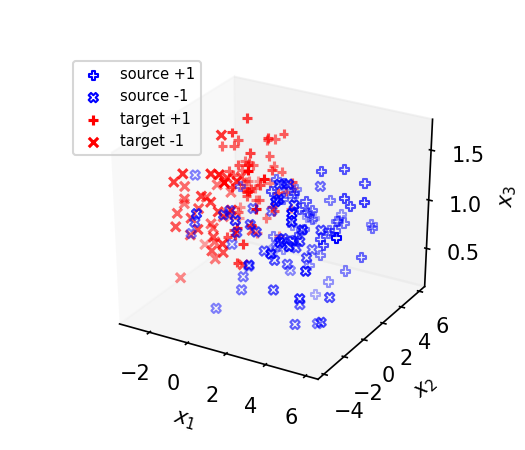

In [3]:
Xs,ys,Xt,yt = gen_data(100,100,sed=20)

plt.figure(figsize=(3.5,3))
ax = plt.subplot(111, projection='3d')
font1 = {'size' : 7}
ax.scatter(Xs[ys==1,0],Xs[ys==1,1], Xs[ys==1,2], color= '',marker='P',edgecolors='b',label='source +1')
ax.scatter(Xs[ys==-1,0],Xs[ys==-1,1], Xs[ys==-1,2], color= '',marker='X',edgecolors='b',label='source -1')
ax.scatter(Xt[yt==1,0],Xt[yt==1,1], Xt[yt==1,2], color= 'r',marker='+',label='target +1')
ax.scatter(Xt[yt==-1,0],Xt[yt==-1,1], Xt[yt==-1,2],color='r', marker='x', label='target -1')

ax.grid(False)
ax.set_xlabel('$x_{1}$')#fontsize=8
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$x_{3}$')


frame = ax.legend(loc='upper left',prop=font1).get_frame()
frame.set_facecolor('none')
save = False
if save:
    pdf = PdfPages('synthetic.pdf')
    pdf.savefig()
    plt.close()
    pdf.close()
else:
    plt.show()

0.805
0.835
0.865
0.895


<IPython.core.display.Javascript object>


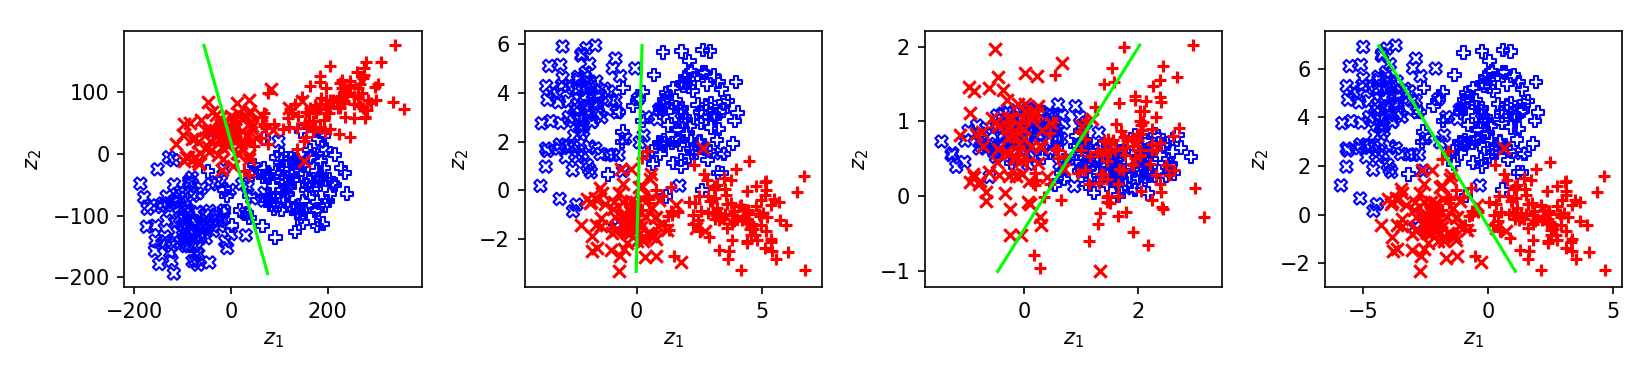

In [4]:
Xs,ys,Xt,yt = gen_data(200,200,sed=20)

def X1_plot(w,X2_plot):
    return [- w[0] / w[1] - w[2] / w[1] * e for e in X2_plot]

baseclf = GridSearchCV(bc.Classifier(bc.exp,bc.exp_grad),cv=5,n_jobs=3,param_grid={'lamda':[1e-2,1e-1,1,1e1,1e2]})

fig1,ax1 = plt.subplots(ncols=4,figsize=(11,2.5))

#tca
tca = tcasstca.TCA(dimension=2)
Xs0,Xt0 = tca.fit_transform(Xs,Xt)
ax1[0].scatter(Xs0[ys==1,0],Xs0[ys==1,1],  c= '',marker='P',edgecolors='b')
ax1[0].scatter(Xs0[ys==-1,0],Xs0[ys==-1,1], c= '',marker='X',edgecolors='b')
ax1[0].scatter(Xt0[yt==1,0],Xt0[yt==1,1],  c= 'r',marker='+')
ax1[0].scatter(Xt0[yt==-1,0],Xt0[yt==-1,1],  c= 'r',marker='x')

baseclf.fit(Xs0,ys)            
baseclf.score(Xt0,yt)
theta = baseclf.best_estimator_.theta_.values()[0]
print baseclf.score(Xt0,yt)

X2_plot = np.arange(Xs0[:,1].min(),Xt0[:,1].max(),0.01)
ax1[0].plot(X1_plot(theta,X2_plot),X2_plot, color='lime')
ax1[0].set_xlabel(r'$z_{1}$')
ax1[0].set_ylabel(r'$z_{2}$')

#sa
sasa = sa.SA(dimension=2)
Xs1,Xt1 = sasa.fit_transform(Xs,Xt)
ax1[1].scatter(Xs1[ys==1,0],Xs1[ys==1,1], c= '',marker='P',edgecolors='b')
ax1[1].scatter(Xs1[ys==-1,0],Xs1[ys==-1,1], c= '',marker='X',edgecolors='b')
ax1[1].scatter(Xt1[yt==1,0],Xt1[yt==1,1],  c= 'r',marker='+')
ax1[1].scatter(Xt1[yt==-1,0],Xt1[yt==-1,1],  c= 'r',marker='x')

baseclf.fit(Xs1,ys)            
baseclf.score(Xt1,yt)
theta = baseclf.best_estimator_.theta_.values()[0]
print baseclf.score(Xt1,yt)

X2_plot = np.arange(Xt1[:,1].min(),Xs1[:,1].max(),0.01)
ax1[1].plot(X1_plot(theta,X2_plot),X2_plot, color='lime')
ax1[1].set_xlabel(r'$z_{1}$')
ax1[1].set_ylabel(r'$z_{2}$')

#jgsa
jgsajgsa = jgsa.JGSA(k=2,beta=0.001)
Xs2,Xt2,_1,_2 = jgsajgsa.fit_transform(Xs,Xt,ys,jgsa.knn.fit(Xs,ys).predict(Xt),yt)
ax1[2].scatter(Xs2[ys==1,0],Xs2[ys==1,1], c= '',marker='P',edgecolors='b')
ax1[2].scatter(Xs2[ys==-1,0],Xs2[ys==-1,1], c= '',marker='X',edgecolors='b')
ax1[2].scatter(Xt2[yt==1,0],Xt2[yt==1,1],  c= 'r',marker='+')
ax1[2].scatter(Xt2[yt==-1,0],Xt2[yt==-1,1],  c= 'r',marker='x')

baseclf.fit(Xs2,ys)            
baseclf.score(Xt2,yt)
theta = baseclf.best_estimator_.theta_.values()[0]
print baseclf.score(Xt2,yt)

X2_plot = np.arange(Xt2[:,1].min(),Xt2[:,1].max(),0.01)
ax1[2].plot(X1_plot(theta,X2_plot),X2_plot, color='lime')
ax1[2].set_xlabel(r'$z_{1}$')
ax1[2].set_ylabel(r'$z_{2}$')

#ours
pca = PCA(n_components=2).fit(Xt)
Xs3 = pca.transform(Xs)
Xt3 = pca.transform(Xt)
ax1[3].scatter(Xs3[ys==1,0],Xs3[ys==1,1],   c= '',marker='P',edgecolors='b')
ax1[3].scatter(Xs3[ys==-1,0],Xs3[ys==-1,1],  c= '',marker='X',edgecolors='b')
ax1[3].scatter(Xt3[yt==1,0],Xt3[yt==1,1],  c= 'r',marker='+')
ax1[3].scatter(Xt3[yt==-1,0],Xt3[yt==-1,1],  c= 'r',marker='x')

lg = ours.GCSC(ours.exp,ours.expon,Xt3,lamda_wht=1, lamda_clf=0.1)
lg.fit(Xs3,ys)
theta = lg.theta_.values()[0]
print lg.score(Xt3,yt)

X2_plot = np.arange(Xt3[:,1].min(),Xs3[:,1].max(),0.01)
ax1[3].plot(X1_plot(theta,X2_plot),X2_plot, color='lime')
ax1[3].set_xlabel(r'$z_{1}$')
ax1[3].set_ylabel(r'$z_{2}$')

plt.tight_layout()
save = False
if save:
    pdf = PdfPages('comparison.pdf')
    pdf.savefig()
    plt.close()
    pdf.close()
else:
    plt.show()